In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

# Chapter 3. Unsupervised Learning and Preprocessing

The second family of machine learning algorithms that we will discuss is unsupervised learning algorithms.  
Unsupervised learning subsumes all kinds of machine learning where there is no known output, no teacher to instruct the learning algorithm.  
In unsupervised learning, the learning algorithm is just shown the input data and asked to extract knowledge from this data.

## Types of Unsupervised Learning

We will look into two kinds of unsupervised learning in this chapter: transformations of the dataset and clustering.

**Unsupervised transformations** of a dataset are algorithms that create a new representation of the data which might be easier for humans or other machine learning algorithms to understand compared to the original representation of the data.  
A common application of unsupervised transformations is dimensionality reduction, which takes a high-dimensional representation of the data, consisting of many features, and finds a new way to represent this data that summarizes the essential characteristics with fewer features.  
A common application for dimensionality reduction is reduction to two dimensions for visualization purposes.  
Another application for unsupervised transformations is finding the parts or components that “make up” the data.  
An example of this is topic extraction on collections of text documents.  
Here, the task is to find the unknown topics that are talked about in each document, and to learn what topics appear in each document.  
This can be useful for tracking the discussion of themes like elections, gun control, or pop stars on social media.

**Clustering algorithms**, on the other hand, partition data into distinct groups of similar items.  
Consider the example of uploading photos to a social media site.  
To allow you to organize your pictures, the site might want to group together pictures that show the same person.  
However, the site doesn’t know which pictures show whom, and it doesn’t know how many different people appear in your photo collection.  
A sensible approach would be to extract all the faces and divide them into groups of faces that look similar.  
Hopefully, these correspond to the same person, and the images can be grouped together for you.

## Challenges in Unsupervised Learning

A major challenge in unsupervised learning is evaluating whether the algorithm learned something useful.  
Unsupervised learning algorithms are usually applied to data that does not contain any label information, so we don’t know what the right output should be.  
Therefore, it is very hard to say whether a model “did well.”  
For example, our hypothetical clustering algorithm could have grouped together all the pictures that show faces in profile and all the full-face pictures.  
This would certainly be a possible way to divide a collection of pictures of people’s faces, but it’s not the one we were looking for.  
However, there is no way for us to “tell” the algorithm what we are looking for, and often the only way to evaluate the result of an unsupervised algorithm is to inspect it manually.  
As a consequence, unsupervised algorithms are used often in an exploratory setting, when a data scientist wants to understand the data better, rather than as part of a larger automatic system.  
Another common application for unsupervised algorithms is as a preprocessing step for supervised algorithms.  
Learning a new representation of the data can sometimes improve the accuracy of supervised algorithms, or can lead to reduced memory and time consumption.
Before we start with “real” unsupervised algorithms, we will briefly discuss some simple preprocessing methods that often come in handy.  
Even though preprocessing and scaling are often used in tandem with supervised learning algorithms, scaling methods don’t make use of the supervised information, making them unsupervised.

## Preprocessing and Scaling

In the previous chapter we saw that some algorithms, like neural networks and SVMs, are very sensitive to the scaling of the data.  
Therefore, a common practice is to adjust the features so that the data representation is more suitable for these algorithms.  
Often, this is a simple per-feature rescaling and shift of the data.  
The following code (Figure 3-1) shows a simple example:

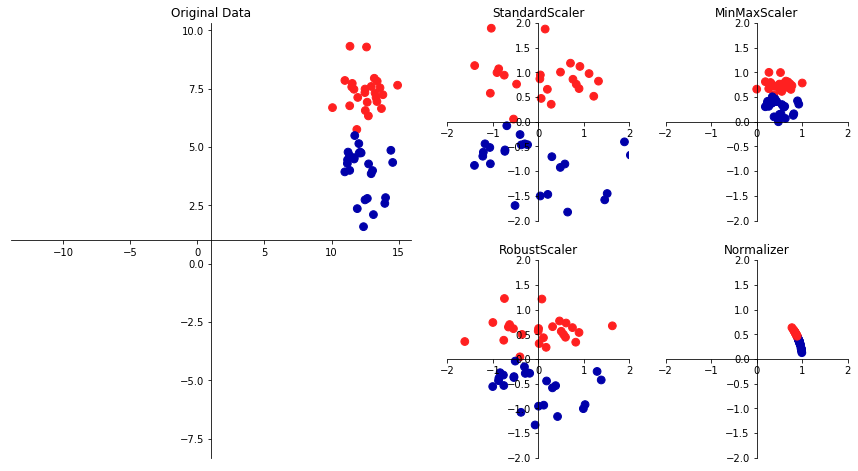

In [35]:
mglearn.plots.plot_scaling()

### Different Kinds of Preprocessing

The first plot in Figure 3-1 shows a synthetic two-class classification dataset with two features.  
The first feature (the x-axis value) is between 10 and 15.  
The second feature (the y-axis value) is between around 1 and 9.
The following four plots show four different ways to transform the data that yield more standard ranges.  
The [StandardScaler in scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) ensures that for each feature the mean is 0 and the variance is 1, bringing all features to the same magnitude.  
However, this scaling does not ensure any particular minimum and maximum values for the features.  
The [RobustScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) works similarly to the `StandardScaler` in that it ensures statistical properties for each feature that guarantee that they are on the same scale.  
However, the `RobustScaler` uses the median and quartiles, instead of mean and variance.  
This makes the `RobustScaler` ignore data points that are very different from the rest (like measurement errors).  
These odd data points are also called outliers, and can lead to trouble for other scaling techniques.

The [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), on the other hand, shifts the data such that all features are exactly between 0 and 1.  
For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis between 0 and 1.
Finally, the [Normalizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) does a very different kind of rescaling.  
It scales each data point such that the feature vector has a Euclidean length of 1.  
In other words, it projects a data point on the circle (or sphere, in the case of higher dimensions) with a radius of 1.  
This means every data point is scaled by a different number (by the inverse of its length).  
This normalization is often used when only the direction (or angle) of the data matters, not the length of the feature vector.

### Applying Data Transformations

Now that we’ve seen what the different kinds of transformations do, let’s apply them using `scikit-learn`.  
We will use the cancer dataset that we saw in Chapter 2.  
Preprocessing methods like the scalers are usually applied before applying a supervised machine learning algorithm.  
As an example, say we want to apply the kernel `SVM (SVC)` to the cancer dataset, and use `MinMaxScaler` for preprocessing the data.  
We start by loading our dataset and splitting it into a training set and a test set (we need separate training and test sets to evaluate the supervised model we will build after the preprocessing):

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1)

print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))

X_train.shape: (426, 30)
X_test.shape: (143, 30)


As a reminder, the dataset contains 569 data points, each represented by 30 measurements.  
We split the dataset into 426 samples for the training set and 143 samples for the test set.  
As with the supervised models we built earlier, we first import the class that implements the preprocessing, and then instantiate that class:

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

We then fit the scaler using the fit method, applied to the training data.  
For the `MinMaxScaler`, the fit method computes the minimum and maximum value of each feature on the training set.  
In contrast to the classifiers and regressors of Chapter 2, the scaler is only provided with the data (`X_train`) when fit is called, and `y_train` is not used:

In [38]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

To apply the transformation that we just learned -- that is, to actually *scale* the training data -- we use the `transform` method of the scaler.  
The `transform` method is used in `scikit-learn` whenever a model returns a new representation of the data:

In [39]:
# Transform the data:
X_train_scaled = scaler.transform(X_train)

# Print dataset properties before and after scaling:
print("Transformed shape: {}".format(X_train_scaled.shape))
print()
print("Per-feature minimum before scaling: \n{}".format(
                                   X_train.min(axis=0)))
print("Per-feature maximum before scaling: \n{}".format(
                                   X_train.max(axis=0)))
print()
print("Per-feature minimum after scaling: \n{}".format(
                           X_train_scaled.min(axis=0)))
print("Per-feature maximum after scaling: \n{}".format(
                           X_train_scaled.max(axis=0)))

Transformed shape: (426, 30)

Per-feature minimum before scaling: 
[  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
Per-feature maximum before scaling: 
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+

The transformed data has the same shape as the original data -- the features are simply shifted and scaled.  
You can see that all of the features are now between 0 and 1, as desired.  
To apply the SVM to the scaled data, we also need to transform the test set.  
This is again done by calling the `transform` method, this time on `X_test`:

In [40]:
# Transform the test data:
X_test_scaled = scaler.transform(X_test)

# Print test data properties after scaling:
print("Per-feature minimum after scaling: \n{}".format(
                            X_test_scaled.min(axis=0)))
print()
print("Per-feature maximum after scaling: \n{}".format(
                            X_test_scaled.max(axis=0)))

Per-feature minimum after scaling: 
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]

Per-feature maximum after scaling: 
[ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


Maybe somewhat surprisingly, you can see that for the test set, after scaling, the minimum and maximum are not 0 and 1.  
Some of the features are even outside the 0–1 range!  
The explanation is that the `MinMaxScaler` (and all the other scalers) always applies exactly the same transformation to the training and the test set.  
This means the transform method always subtracts the training set minimum and divides by the training set range, which might be different from the minimum and range for the test set.

### Scaling Training and Test Data the Same Way

It is important to apply exactly the same transformation to the training set and the test set for the supervised model to work on the test set.  
The following example (Figure 3-2) illustrates what would happen if we were to use the minimum and range of the test set instead:

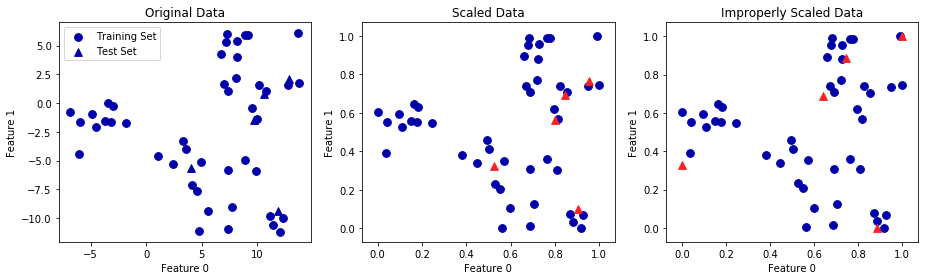

In [41]:
from sklearn.datasets import make_blobs

# Make synthetic data:
X, _ = make_blobs(n_samples=50, centers=5,
                  random_state=4, cluster_std=2)
# Split the data into training and test sets:
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

# Plot the training and test sets:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training Set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(0), label="Test Set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the properly scaled data:
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training Set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                marker='^', c=mglearn.cm2(1), label="Test Set", s=60)
axes[1].set_title("Scaled Data")

# Rescale the test separately so test set min is 0 and max is 1.
# This example is for illustrative purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Visualize improperly scaled data:
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training Set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="Test Set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

The first panel is an unscaled two-dimensional dataset, with the training set shown as circles and the test set shown as triangles.  
The second panel is the same data, but scaled using the `MinMaxScaler`.  
Here, we called `fit` on the training set, and then called `transform` on the training and test sets.  
You can see that the dataset in the second panel looks identical to the first; only the ticks on the axes have changed.  
Now all the features are between 0 and 1.  
You can also see that the minimum and maximum feature values for the test data (the triangles) are not 0 and 1.
The third panel shows what would happen if we scaled the training set and test set separately.  
In this case, the minimum and maximum feature values for both the training and the test set are 0 and 1.  
But now the dataset looks different.  
The test points moved incongruously to the training set, as they were scaled differently.  
We changed the arrangement of the data in an arbitrary way.  
Clearly this is not what we want to do.

As another way to think about this, imagine your test set is a single point.  
There is no way to scale a single point correctly, to fulfill the minimum and maximum requirements of the `MinMaxScaler`.  
But the size of your test set should not change your processing.

**Shortcuts and Efficient Alternatives**  
Often, you want to fit a model on some dataset, and then transform it.  
This is a very common task, which can often be computed more efficiently than by simply calling `fit` and then `transform`.  
For this use case, all models that have a transform method also have a `fit_transform` method.  
Here is an example using `StandardScaler`:

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Call fit and transform in sequence using method chaining:
X_scaled = scaler.fit(X_train).transform(X_train)

# This code gives the same result with more efficient computation:
x_scaled_d = scaler.fit_transform(X_train)

While `fit_transform` is not necessarily more efficient for all models, it is still good practice to use this method when trying to transform the training set.

### The Effect of Preprocessing on Supervised Learning

Now let's go back to the `cancer` dataset and see the effect of using the `MinMaxScaler` on learning the SVC (this is a different way of doing the same scaling that we did in Chapter 2).  
First, let's fit the SVC on the original data again for comparison:

In [43]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


Now, let's scale the data using `MinMaxScaler` before fitting the SVC:

In [44]:
# Preprocessing using 0-1 scaling:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning an SVM on the scaled training data:
svm.fit(X_train_scaled, y_train)

# Scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
              svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


As we saw before, the effect of scaling the data is quite significant.  
Even though scaling the data doesn’t involve any complicated math, it is good practice to use the scaling mechanisms provided by `scikit-learn` instead of reimplementing them yourself, as it’s easy to make mistakes even in these simple computations.  
You can also easily replace one preprocessing algorithm with another by changing the class you use, as all of the preprocessing classes have the same interface, consisting of the `fit` and `transform` methods:

In [45]:
# Preprocessing using zero mean and unit variance scaling:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning an SVM on the scaled training data:
svm.fit(X_train_scaled, y_train)

# Scoring on the scaled test set:
print("SVM test accuracy: {:.2f}".format(
        svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


Now that we've seen how simple data transformations for preprocessing work, let's move on to more interesting transformations using unsupervised learning.

## Dimensionality Reduction, Feature Extraction, and Manifold Learning

As we discussed earlier, transforming data using unsupervised learning can have many motivations.  
The most common motivations are visualization, compressing the data, and finding a representation that is more informative for further processing.  
One of the simplest and most widely used algorithms for all of these is [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis).  
We’ll also look at two other algorithms: [non-negative matrix factorization (NMF)](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization), which is commonly used for feature extraction, and [t-SNE](https://lvdmaaten.github.io/tsne/), which is commonly used for visualization using two-dimensional scatter plots.

### Principal Component Analysis

Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated.  
This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.  
The following example (Figure 3-3) illustrates the effect of PCA on a synthetic two-dimensional dataset:  

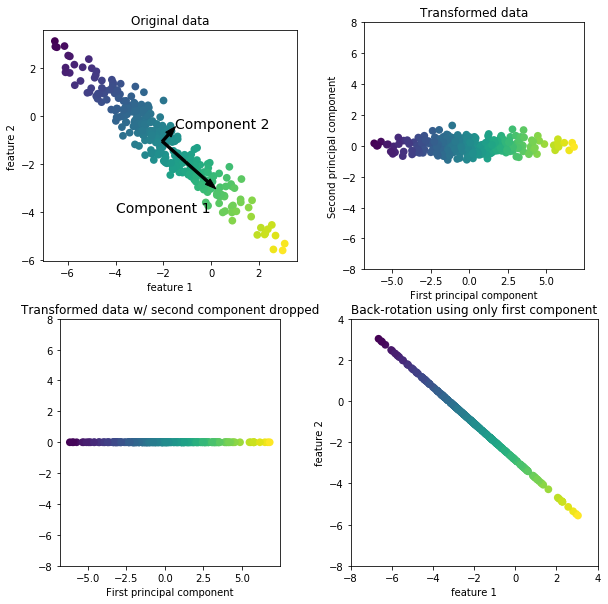

In [46]:
mglearn.plots.plot_pca_illustration()

The first plot (top left) shows the original data points, colored to distinguish among them.  
The algorithm proceeds by first finding the direction of maximum variance, labeled "Component 1".  
This is the direction (or vector) in the data that contains most of the information, or in other words, the direction along which the features are most correlated with each other.  
Then, the algorithm finds the direction that contains the most information while being orthogonal (at a right angle) to the first direction.  
In two dimensions, there is only one possible orientation that is at a right angle, but in higher-dimensional spaces there would be (infinitely) many orthogonal directions.  
Although the two components are drawn as arrows, it doesn’t really matter where the head and the tail are; we could have drawn the first component from the center up to the top left instead of down to the bottom right.  
The directions found using this process are called [principal components](http://www.itl.nist.gov/div898/handbook/pmc/section5/pmc55.htm), as they are the main directions of variance in the data.  
In general, [there are as many principal components as original features](http://setosa.io/ev/principal-component-analysis/).

The second plot (top right) shows the same data, but now rotated so that the first principal component aligns with the x-axis and the second principal component aligns with the y-axis.  
Before the rotation, the mean was subtracted from the data, so that the transformed data is centered around zero.  
In the rotated representation found by PCA, the two axes are uncorrelated, meaning that the correlation matrix of the data in this representation is zero except for the diagonal.  
We can use PCA for dimensionality reduction by retaining only some of the principal components.  
In this example, we might keep only the first principal component, as shown in the third panel in Figure 3-3 (bottom left).  
This reduces the data from a two-dimensional dataset to a one-dimensional dataset.  
Note, however, that instead of keeping only one of the original features, we found the most interesting direction (top left to bottom right in the first panel) and kept this direction, the first principal component.

Finally, we can undo the rotation and add the mean back to the data.  
This will result in the data shown in the last panel in Figure 3-3.  
These points are in the original feature space, but we kept only the information contained in the first principal component.  
This transformation is sometimes used to remove noise effects from the data or visualize what part of the information is retained using the principal components.

#### Applying PCA to the cancer dataset for visualization

One of the most common applications of PCA is visualizing high-dimensional datasets.  
As we saw in Chapter 1, it is hard to create scatter plots of data that have more than two features.  
For the Iris dataset, we were able to create a pair plot (Figure 1-3 in Chapter 1) that gave us a partial picture of the data by showing us all the possible combinations of two features.  
But if we want to look at the Breast Cancer dataset, even using a pair plot is tricky.  
This dataset has 30 features, which would result in 30 * 14 = 420 scatter plots!  
We’d never be able to look at all these plots in detail, let alone try to understand them.
There is an even simpler visualization we can use, though -- computing histograms of each of the features for the two classes, benign and malignant cancer (Figure 3-4):

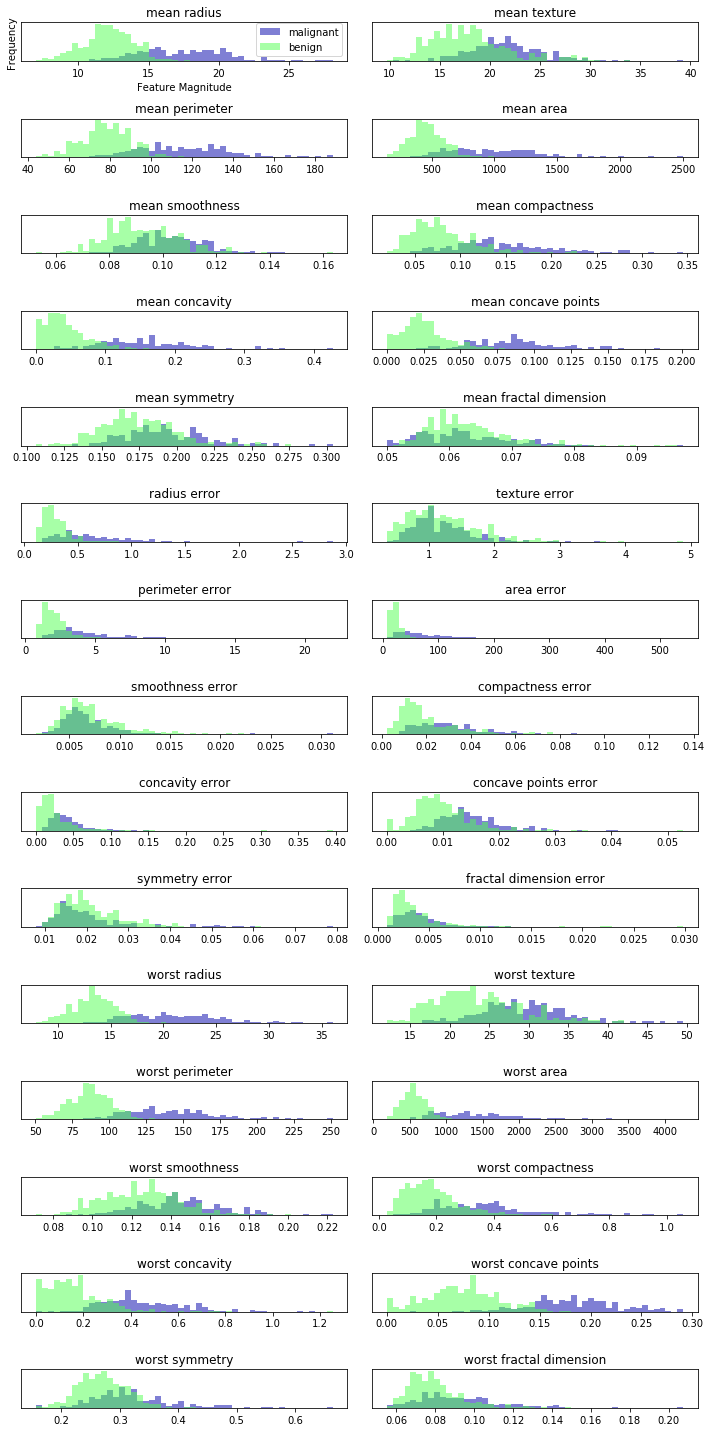

In [47]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins,
               color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins,
               color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature Magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Here we create a histogram for each of the features, counting how often a data point appears with a feature in a certain range (called a bin).  
Each plot overlays two histograms, one for all of the points in the benign class (green) and one for all the points in the malignant class (blue).  
This gives us some idea of how each feature is distributed across the two classes, and allows us to venture a guess as to which features are better at distinguishing malignant and benign samples.  
For example, the feature “smoothness error” seems quite uninformative, because the two histograms mostly overlap, while the feature “worst concave points” seems quite informative, because the histograms are quite disjoint.  
However, this plot doesn’t show us anything about the interactions between variables and how these relate to the classes.  
Using PCA, we can capture the main interactions and get a slightly more complete picture.  
We can find the first two principal components, and visualize the data in this new two-dimensional space with a single scatter plot.  
Before we apply PCA, we scale our data so that each feature has unit variance using `StandardScaler`:

In [48]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
X_scaled[:2]

array([[  1.09706398e+00,  -2.07333501e+00,   1.26993369e+00,
          9.84374905e-01,   1.56846633e+00,   3.28351467e+00,
          2.65287398e+00,   2.53247522e+00,   2.21751501e+00,
          2.25574689e+00,   2.48973393e+00,  -5.65265059e-01,
          2.83303087e+00,   2.48757756e+00,  -2.14001647e-01,
          1.31686157e+00,   7.24026158e-01,   6.60819941e-01,
          1.14875667e+00,   9.07083081e-01,   1.88668963e+00,
         -1.35929347e+00,   2.30360062e+00,   2.00123749e+00,
          1.30768627e+00,   2.61666502e+00,   2.10952635e+00,
          2.29607613e+00,   2.75062224e+00,   1.93701461e+00],
       [  1.82982061e+00,  -3.53632408e-01,   1.68595471e+00,
          1.90870825e+00,  -8.26962447e-01,  -4.87071673e-01,
         -2.38458552e-02,   5.48144156e-01,   1.39236330e-03,
         -8.68652457e-01,   4.99254601e-01,  -8.76243603e-01,
          2.63326966e-01,   7.42401948e-01,  -6.05350847e-01,
         -6.92926270e-01,  -4.40780058e-01,   2.60162067e-01,
       

Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation.  
We instantiate the PCA object, find the principal components by calling the `fit` method, and then apply the rotation and dimensionality reduction by calling `transform`.  
By default, PCA only rotates (and shifts) the data, but keeps all principal components.  
To reduce the dimensionality of the data, we need to specify how many components we want to keep when creating the PCA object:

In [49]:
from sklearn.decomposition import PCA

# Keep the first two principal components of the data:
pca = PCA(n_components=2)
# Fit the PCA model to the breast cancer data:
pca.fit(X_scaled)
# Transform the data onto the first two principal components:
X_pca = pca.transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


We can now plot the first two principal components (Figure 3-5):

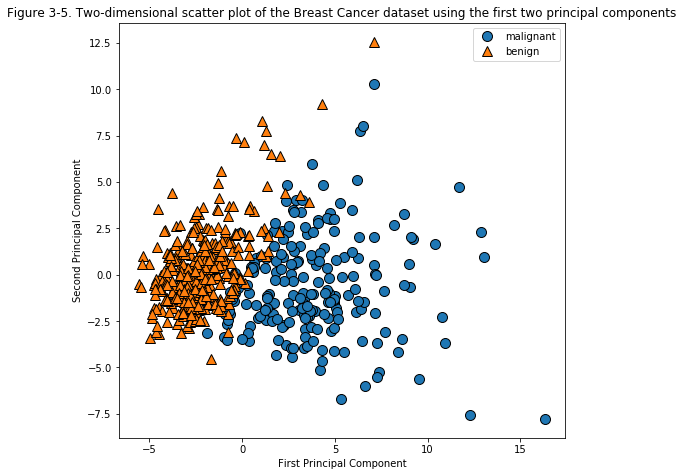

In [50]:
# Plot first vs. second principal component, colored by class:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Figure 3-5. Two-dimensional scatter plot of the " \
"Breast Cancer dataset using the first two principal components")

It is important to note that PCA is an unsupervised method, and does not use any class information when finding the rotation.  
It simply looks at the correlations in the data.  
For the scatter plot shown here, we plotted the first principal component against the second principal component, and then used the class information to color the points.  
You can see that the two classes separate quite well in this two-dimensional space.  
This leads us to believe that even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two classes.  
We can also see that the malignant points are more spread out than the benign point -- something that we could already see a bit from the histograms in Figure 3-4.  
A downside of PCA is that the two axes in the plot are often not very easy to interpret.  
The principal components correspond to directions in the original data, so they are combinations of the original features.  
However, these combinations are usually very complex, as we’ll see shortly.  
The principal components themselves are stored in the `components_` attribute of the PCA object during fitting:

In [51]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Each row in `components_` corresponds to one principal component, and they are sorted by their importance (the first principal component comes first, etc.).  
The columns correspond to the original features attribute of the PCA in this example, `mean radius`,  `mean texture`, and so on.  
Let’s have a look at the content of `components_`:

In [52]:
print("PCA components: \n{}".format(pca.components_))

PCA components: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


We can also visualize the coefficients using a heat map (Figure 3-6), which might be easier to understand:

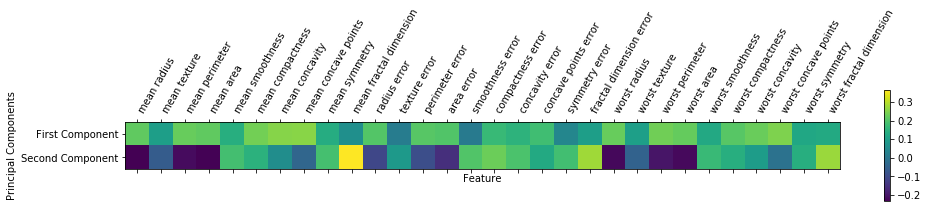

In [53]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First Component", "Second Component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Components")

You can see that in the first component, all features have the same sign (it’s positive, but as we mentioned earlier, it doesn’t matter which direction the arrow points in).  
That means that there is a general correlation between all features.  
As one measurement is high, the others are likely to be high as well.  
The second component has mixed signs, and both of the components involve all of the 30 features.  
This mixing of all features is what makes explaining the axes in Figure 3-6 so tricky.

#### Eigenfaces for feature extraction

Another application of PCA that we mentioned earlier is feature extraction.  
The idea behind feature extraction is that it is possible to find a representation of your data that is better suited to analysis than the raw representation you were given.  
A great example of an application where feature extraction is helpful is with images.  
Images are made up of pixels, usually stored as red, green, and blue (RGB) intensities.  
Objects in images are usually made up of thousands of pixels, and only together are they meaningful.  
We will give a very simple application of feature extraction on images using PCA, by working with face images from the `Labeled Faces in the Wild` dataset.  
This dataset contains face images of celebrities downloaded from the Internet, and it includes faces of politicians, singers, actors, and athletes from the early 2000s.  
We use grayscale versions of these images, and scale them down for faster processing.  
You can see some of the images in Figure 3-7:

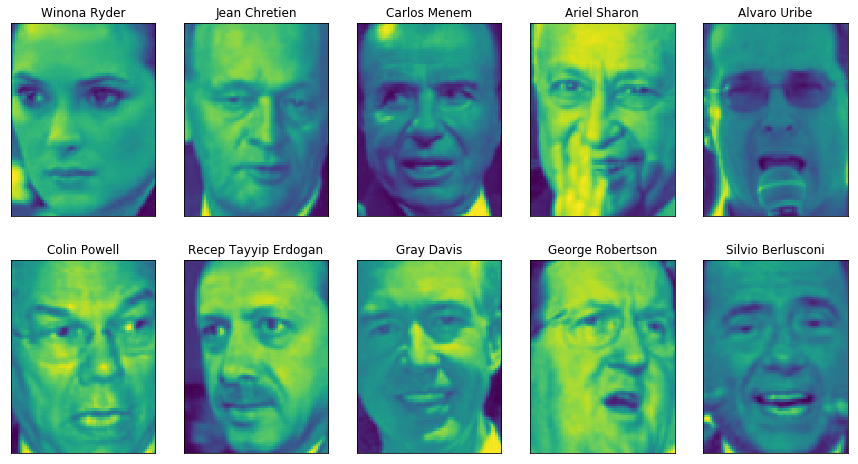

In [54]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape 

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images,
                             axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

![title](images/faces_in_the_wild.png)

There are 3023 images, each image is 87x65 pixels, and the images belong to 62 different people:

In [55]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


The dataset is a bit skewed, however, containing a lot of images of George W. Bush and Colin Powell, as you can see here:

In [56]:
# Count how often each target appears:
counts = np.bincount(people.target)
# Print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='  ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

To make the data less skewed, we will only take up to 50 images of each person (otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush):

In [57]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# The next line of code scales the grayscale values to be between
# 0 and 1 instead of 0 and 255 for better numeric stability.
X_people = X_people / 255

A common task in face recognition is to ask if a previously unseen face belongs to a known person from a database.  
This has applications in photo collection, social media, and security applications.  
One way to solve this problem would be to build a classifier where each person is a separate class.  
However, there are usually many different people in face databases, and very few images of the same person (i.e., very few training examples per class).  
That makes it hard to train most classifiers.  
Additionally, you often want to be able to add new people easily, without needing to retrain a large model.
A simple solution is to use a one-nearest-neighbor classifier that looks for the most similar face image to the face you are classifying.  
This classifier could in principle work with only a single training example per class.  
Let’s take a look at how well `KNeighborsClassifier` does here:

In [58]:
from sklearn.neighbors import KNeighborsClassifier
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# Build a KNeighborsClassifier using one neighbor 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(
    knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


We obtain an accuracy of 23%, which is not actually that bad for a 62-class classification problem (random guessing would give you around 1/62 = 1.6% accuracy), but is also not great.  
We only correctly identify a person every fourth time.

This is where PCA comes in.  
Computing distances in the original pixel space is quite a bad way to measure similarity between faces.  
When using a pixel representation to compare two images, we compare the grayscale value of each individual pixel to the value of the pixel in the corresponding position in the other image.  
This representation is quite different from how humans would interpret the image of a face, and it is hard to capture the facial features using this raw representation.  
For example, using pixel distances means that shifting a face by one pixel to the right corresponds to a drastic change, with a completely different representation.  
We hope that using distances along principal components can improve our accuracy.  
Here, we enable the [whitening option of PCA](http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/), which rescales the principal components to have the same scale.  
This is the same as using `StandardScaler` after the transformation.  
Reusing the data from Figure 3-3 again, whitening corresponds to not only rotating the data, but also rescaling it so that the center panel is a circle instead of an ellipse (see Figure 3-8):

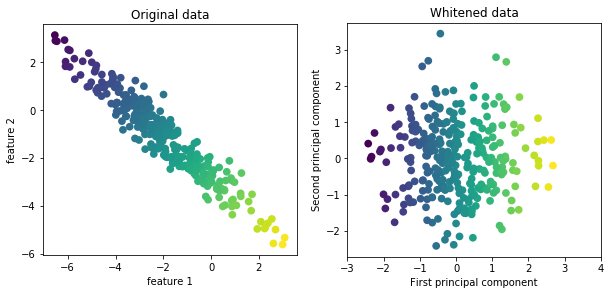

In [59]:
mglearn.plots.plot_pca_whitening()

We fit the PCA object to the training data and extract the first 100 principal components.  
Then we transform the training and test data:

In [60]:
pca = PCA(n_components=100, whiten=True,
         random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


The new data has 100 features, the first 100 principal components.  
Now, we can use the new representation to classify our images using a one-nearest-neighbors classifier:

In [61]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(
            knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


Our accuracy improved from 23% to 31%, confirming the intuition that the principal components might provide a better representation of the data.  
For image data, we can also easily visualize the principal components that are found.  
Remember that components correspond to directions in the input space.  
The input space here is 87×65-pixel grayscale images, so directions within this space are also 87×65-pixel grayscale images.  
Let’s look at the first couple of principal components (Figure 3-9):

In [62]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


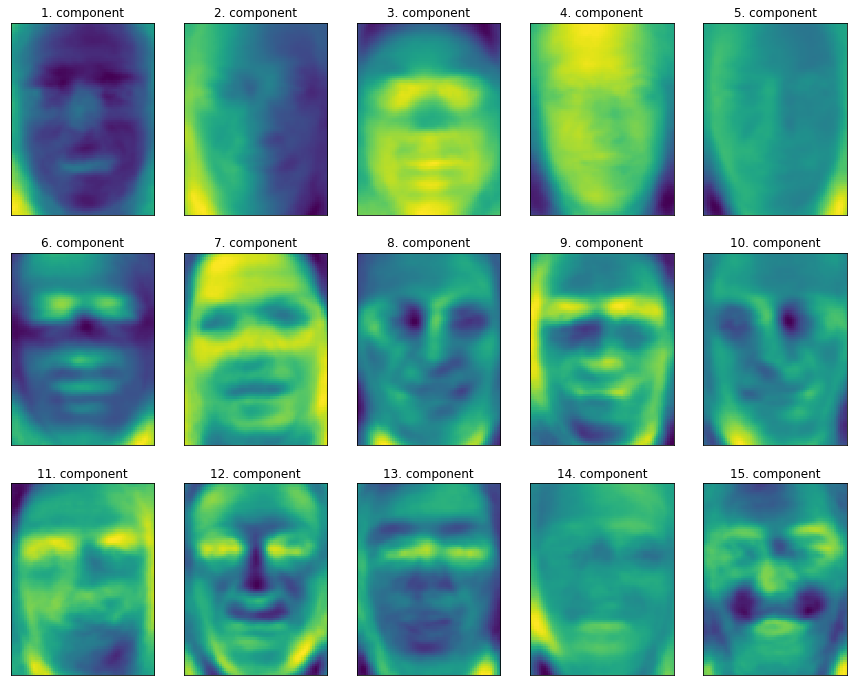

In [63]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_,
                                        axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

While we certainly cannot understand all aspects of these components, we can guess which aspects of the face images some of the components are capturing.  
The first component seems to mostly encode the contrast between the face and the background, the second component encodes differences in lighting between the right and the left half of the face, and so on.  
While this representation is slightly more semantic than the raw pixel values, it is still quite far from how a human might perceive a face.  
As the PCA model is based on pixels, the alignment of the face (the position of eyes, chin, and nose) and the lighting both have a strong influence on how similar two images are in their pixel representation.  
But alignment and lighting are probably not what a human would perceive first.  
When asking people to rate similarity of faces, they are more likely to use attributes like age, gender, facial expression, and hair style, which are attributes that are hard to infer from the pixel intensities.  
It’s important to keep in mind that algorithms often interpret data (particularly visual data, such as images, which humans are very familiar with) quite differently from how a human would.

Let’s come back to the specific case of PCA, though.  
We introduced the PCA transformation as rotating the data and then dropping the components with low variance.  
Another useful interpretation is to try to find some numbers (the new feature values after the PCA rotation) so that we can express the test points as a weighted sum of the principal components (see Figure 3-10).

![](images/figure3-10.png)
Figure 3-10. Schematic view of PCA as decomposing an image into a weighted sum of components

Here, $x_0$, $x_1$, and so on are the coefficients of the principal components for this data point; in other words, they are the representation of the image in the rotated space.  
Another way we can try to understand what a PCA model is doing is by looking at the reconstructions of the original data using only some components.  
In Figure 3-3, after dropping the second component and arriving at the third panel, we undid the rotation and added the mean back to obtain new points in the original space with the second component removed, as shown in the last panel.  
We can do a similar transformation for the faces by reducing the data to only some principal components and then rotating back into the original space.  
This return to the original feature space can be done using the `inverse_transform` method.  
Here, we visualize the reconstruction of some faces using 10, 50, 100, or 500 components (Figure 3-11):

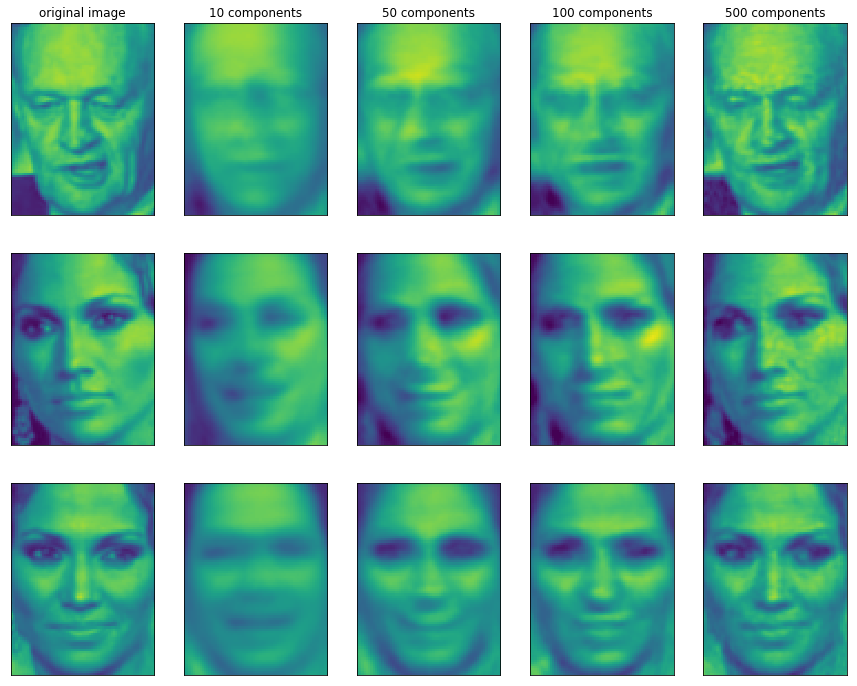

In [64]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

You can see that when we use only the first 10 principal components, only the essence of the picture, like the face orientation and lighting, is captured.  
By using more and more principal components, more and more details in the image are preserved.  
This corresponds to extending the sum in Figure 3-10 to include more and more terms.  
Using as many components as there are pixels would mean that we would not discard any information after the rotation, and we would reconstruct the image perfectly.  
We can also try to use PCA to visualize all of the faces in the dataset in a scatter plot using the first two principal components (Figure 3-12), with classes given by who is shown in the image, similarly to what we did for the cancer dataset:

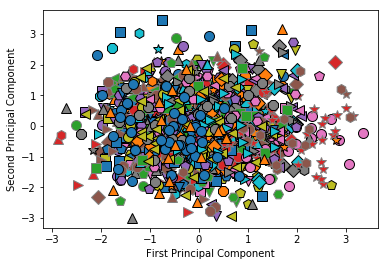

In [65]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

As you can see, when we use only the first two principal components, the corpus of data is just a big blob, with no separation of classes visible.  
This is not very surprising, given that even with 10 components, as shown earlier in Figure 3-11, PCA only capture very rough characteristics of the faces.

### Non-Negative Matrix Factorization (NMF)

Non-negative matrix factorization is another unsupervised learning algorithm that aims to extract useful features.  
It works similarly to PCA and can also be used for dimensionality reduction.  
As in PCA, we are trying to write each data point as a weighted sum of some components, as illustrated in Figure 3-10.  
But whereas in PCA we wanted components that were orthogonal and that explained as much variance of the data as possible, in NMF, we want the components and the coefficients to be non-negative; that is, we want both the components and the coefficients to be greater than or equal to zero.  
Consequently, this method can only be applied to data where each feature is non-negative, as a non-negative sum of non-negative components cannot become negative.

The process of decomposing data into a non-negative weighted sum is particularly helpful for data that is created as the addition (or overlay) of several independent sources, such as an audio track of multiple people speaking, or music with many instruments.  
In these situations, NMF can identify the original components that make up the combined data.  
Overall, NMF leads to more interpretable components than PCA, as negative components and coefficients can lead to hard-to-interpret cancellation effects.  
The eigenfaces in Figure 3-9, for example, contain both positive and negative parts, and as we mentioned in the description of PCA, the sign is actually arbitrary.  
Before we apply NMF to the face dataset, let’s briefly revisit the synthetic data.

#### Applying NMF to synthetic data

In contrast to using PCA, we need to ensure that our data is positive for NMF to be able to operate on the data.  
This means where the data lies relative to the origin (0, 0) actually matters for NMF.  
Therefore, you can think of the non-negative components that are extracted as directions from (0, 0) toward the data.
The following example (Figure 3-13) shows the results of NMF on the two-dimensional toy data:

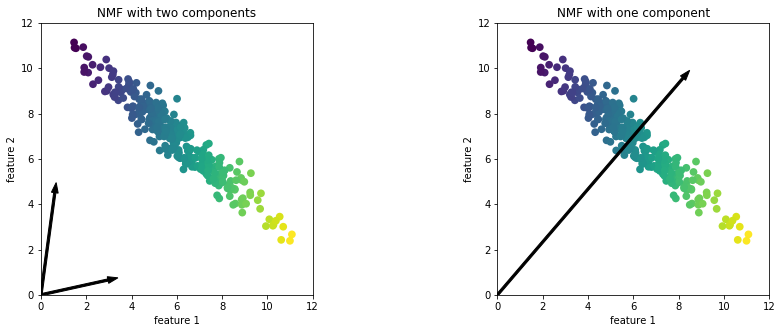

In [66]:
mglearn.plots.plot_nmf_illustration()

For NMF with two components, as shown on the left, it is clear that all points in the data can be written as a positive combination of the two components.  
If there are enough components to perfectly reconstruct the data (as many components as there are features), the algorithm will choose directions that point toward the extremes of the data.  
If we only use a single component, NMF creates a component that points toward the mean, as pointing there best explains the data.  
You can see that in contrast with PCA, reducing the number of components not only removes some directions, but creates an entirely different set of components!  
Components in NMF are also not ordered in any specific way, so there is no “first non-negative component”: all components play an equal part.  
NMF uses a random initialization, which might lead to different results depending on the random seed.  
In relatively simple cases such as the synthetic data with two components, where all the data can be explained perfectly, the randomness has little effect (though it might change the order or scale of the components).  
In more complex situations, there might be more drastic changes.

#### Applying NMF to face images